In [1]:
# remove two ensemble members from wetcharts, write out the result
# following Nesser et al., 2023
import xarray as xr
import numpy as np

wetcharts1_3_1 = xr.open_dataset("/n/holyscratch01/external_repos/GEOS-CHEM/gcgrid/gcdata/ExtData/HEMCO/CH4/v2020-09/JPL_WetCharts/HEensemble/WetCHARTs_Highest_performance_Ensemble_v1.3.1_2010_2019.nc", decode_times=False)

# Models to remove from ensemble following Nesser et al., 2023
models_to_remove = [2913, 1923]  

# Create a boolean mask indicating which models to keep
models_to_keep = ~wetcharts1_3_1['model'].isin(models_to_remove)

# Select and keep the models you want
modified_wetcharts = wetcharts1_3_1.sel(model=models_to_keep)
modified_wetcharts.to_netcdf("/net/holy-nfsisilon/ifs/rc_labs/jacob_lab/Users/lestrada/CONUS_Example_application/modified_wetcharts/WetCHARTs_Highest_performance_Ensemble_v1.3.1_2010_2019_modified.nc")


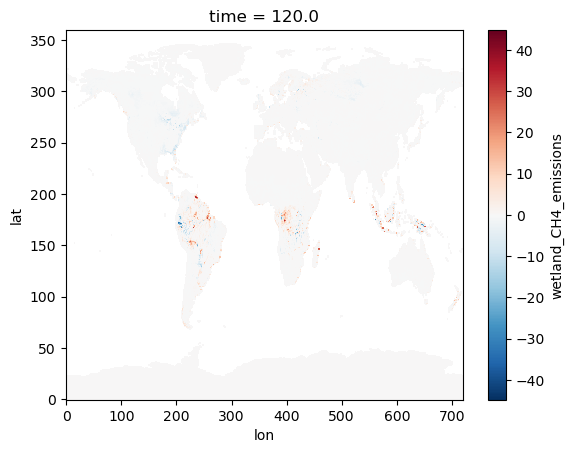

In [2]:
(modified_wetcharts["wetland_CH4_emissions"][:,-1,:,:].mean(dim="model") - wetcharts1_3_1["wetland_CH4_emissions"][:,-1,:,:].mean(dim="model")).plot()